
### DBSCAN Algoritması ( Yoğunluk Tabanlı Kümeleme )

Kümelemeler ve gürültü kavramına dayalı olarak çalışan algoritmadır.
En azından minimum sayıda nokta içermesi gerekir.
İyi ayrılmış kümelerde çalışırken uygun bir algoritmadır.

Gerekli parametreler:

**- eps :** iki nokta arasındaki mesafe. Bir veri noktasının etrafındaki komşuluğu tanımlar.
İki nokta arasındaki mesafe eps ye eşit ya da daha küçükse bunlar komşu olarak kabul edilir.
k-distance grafikleri eps hesaplamalarında kullanılır.

**- MinPts :** Eps yarıçapı içerisindeki minimum komşu sayısını ifade eder. Veri kümesi ne kadar büyük olursa,
MinPts o kadar büyük seçilmelidir. MinPts en az 3 seçilmelidir.

 Bu algoritmada 3 tip veri nooktası vardır:

 - Çekirdek nokta
 - Sıfır noktası
 - Gürültü veya aykırı değerler

Silhouette score ve Adjusted Rand Score



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
X , y_true = make_blobs(n_samples= 300, centers = 4, cluster_std=0.50, random_state=0)

['y', 'b', 'g', 'r']


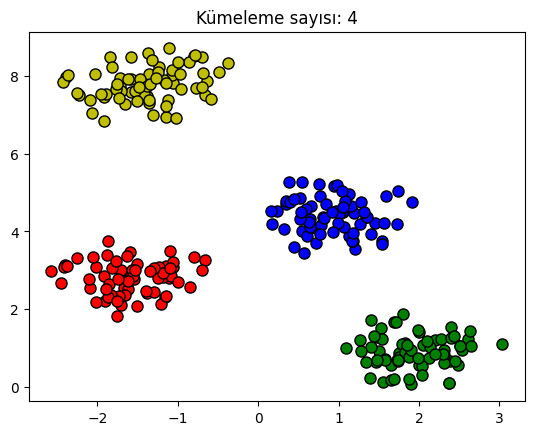

In [7]:
db = DBSCAN(eps=0.8, min_samples=15).fit(X) # X veri kümesi DBSCAN üzerinde uygulanır.
core_samples  = np.zeros_like(db.labels_, dtype = bool)
core_samples[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # Küme sayısını belirler.
uniq_labels = set(labels)
colors = ['y','b','g','r']
print(colors)

for k, col in zip(uniq_labels, colors):
    if k == -1:
        col= 'k'
    class_member_ara= (labels == k)

    xy = X[class_member_ara & core_samples]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k',
            markersize=8)
noise_mask= (labels == -1)
noise_points= X[noise_mask]
plt.plot(noise_points[:,0], noise_points[:,1],'o', markerfacecolor='black',markeredgecolor='black', markersize=8, label='gürültü')
plt.title('Kümeleme sayısı: %d' % n_clusters_)
plt.show()

In [8]:
silhouette = metrics.silhouette_score(X, labels)
print('Silhouette Score: %0.2f' % silhouette)

adjusted_rand = metrics.adjusted_rand_score(y_true, labels)
print('Adjusted Rand Score: %0.2f' % adjusted_rand)

Silhouette Score: 0.74
Adjusted Rand Score: 1.00
